### Config

In [35]:
import pandas as pd
import sqlite3
import requests

In [36]:
import mlflow

In [37]:
import datetime
import logging
import json
import time

In [38]:
import api_limit_handler
import api_limit_handler_v2

In [39]:
import os
from dotenv import load_dotenv

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%reload_ext dotenv
%dotenv .env

cannot find .env file


In [42]:
load_dotenv()

False

In [43]:
# api_limit = api_limit_handler.APILimitHandler()

In [44]:
rapidapi_key = os.getenv('rapidapi-key')
rapidapi_host = os.getenv('rapidapi-host')

In [45]:
log = logging.getLogger(__name__)                                  
# log.setLevel(logging.INFO)   
logging.basicConfig(level=logging.DEBUG, format='%(message)s')

### Load data

In [46]:
headers = {
	'x-rapidapi-key': rapidapi_key,
	'x-rapidapi-host': rapidapi_host
}


In [47]:
def print_response(response):
    print(json.dumps(response.json(), indent=4))


In [48]:
from api_limit_handler_v2 import check_requests, prueba

In [49]:
# ewe = prueba("a")
# print(ewe)

In [50]:
league = 140
season = 2022
country = "Spain"

In [51]:
url = "https://api-football-v1.p.rapidapi.com/v3/teams"

querystring = {"country": country, "league": league, "season": season}

response = requests.get(url, headers=headers, params=querystring)

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/teams?country=Spain&league=140&season=2022 HTTP/11" 401 None


In [52]:
teams = json.loads(response.text).get('response')

In [53]:
teams_id = [team['team']['id'] for team in teams]

TypeError: 'NoneType' object is not iterable

In [ ]:
import pandas as pd


@check_requests
def get_team_info(team_id, query_date):

    url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"

    querystring = {"league": 140, "season": 2022, "team": team_id, "date": query_date}

    response = requests.get(url, headers=headers, params=querystring)

    response_content = json.loads(response.text)["response"]

    team_id = response_content["team"]["id"]
    name = response_content["team"]["name"]

    history = response_content["form"]

    total_played = response_content["fixtures"]["played"]["total"]

    wins_home = response_content["fixtures"]["wins"]["home"]
    wins_away = response_content["fixtures"]["wins"]["away"]

    draws_home = response_content["fixtures"]["draws"]["home"]
    draws_away = response_content["fixtures"]["draws"]["away"]

    loses_home = response_content["fixtures"]["loses"]["home"]
    loses_away = response_content["fixtures"]["loses"]["away"]

    goals_for_home = response_content["goals"]["for"]["total"]["home"]
    goals_for_away = response_content["goals"]["for"]["total"]["away"]

    goals_against_home = response_content["goals"]["against"]["total"]["home"]
    goals_against_away = response_content["goals"]["against"]["total"]["away"]

    return (
        team_id,
        query_date,
        name,
        history,
        total_played,
        wins_home,
        wins_away,
        draws_home,
        draws_away,
        loses_home,
        loses_away,
        goals_for_home,
        goals_for_away,
        goals_against_home,
        goals_against_away,
    )

In [ ]:
query_date = "2022-08-18"

In [ ]:
#TODO
first_match_date = datetime.date(2022,8,11)
last_match_date =  datetime.date(2023,6,10)

In [ ]:
# Get all wednesdays of a year
diff_to_wednesday = (7 - 5 - first_match_date.weekday()) % 7

# print(diff_to_wednesday)

if diff_to_wednesday > 0 :
    first_wednesday = first_match_date + datetime.timedelta(diff_to_wednesday)
else:
    first_wednesday = first_match_date - datetime.timedelta(diff_to_wednesday)

new_date = first_wednesday
wednesdays = []
while new_date < last_match_date:
    wednesdays.append(new_date)
    new_date = new_date + datetime.timedelta(7)

In [ ]:
#TODO: lanzar quitando los equipos ya cargados al completo

In [ ]:
# Load current data
with sqlite3.connect('soccer.db') as conn:
    teams_db = pd.read_sql('select * from teams', conn)

data_retrieved = teams_db[(teams_db["team_id"]==529) & (teams_db["query_date"]=="2022-09-07")]

In [ ]:
len(wednesdays)

43

In [ ]:
# Load current data
with sqlite3.connect('soccer.db') as conn:
    teams_db = pd.read_sql('select * from teams', conn)

teams = {}
for team_id in teams_id:
    team_data = {}
    for query_date in wednesdays[3:]:
        print(" = ")
        data_retrieved = teams_db[(teams_db["team_id"]==team_id) & (teams_db["query_date"]==str(query_date))]
        # print(data_retrieved)
        # If data is not available at db, get it
        if data_retrieved.empty:
            print(f"Data needed for team {team_id} and query date {query_date}")
            team_data[query_date] = get_team_info(team_id, query_date)
            time.sleep(5)
    teams[team_id] = team_data

 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 
 = 


In [ ]:
for team, team_data in teams.items():
    df_teams = pd.DataFrame.from_dict(
        team_data,
        orient="index",
        columns=[
            "team_id",
            "query_date",
            "name",
            "history",
            "total_played",
            "wins_home",
            "wins_away",
            "draws_home",
            "draws_away",
            "loses_home",
            "loses_away",
            "goals_for_home",
            "goals_for_away",
            "goals_against_home",
            "goals_against_away",
        ],
    )
    with sqlite3.connect('soccer.db') as conn:
        df_teams.to_sql(name="teams", con=conn, if_exists="append", index=False)

In [ ]:
# teams = {}
# for team_id in teams_id:
#     team_data = {}
#     for query_date in wednesdays[3:5]:
#         team_data[query_date] = get_team_info(team_id, query_date)
#         time.sleep(5)
#     teams[team_id] = team_data

In [ ]:
url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/rounds"

querystring = {"league":140, "season": 2022}

response = requests.get(url, headers=headers, params=querystring)

rounds = json.loads(response.text).get('response')

Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures/rounds?league=140&season=2022 HTTP/11" 200 None


In [ ]:
# rs = [re.search('Regular Season - (\d+)', round).group(1) for round in r]

In [ ]:
# rounds = ['Regular Season - 32', 'Regular Season - 33', 'Regular Season - 34']

In [ ]:
import re

In [ ]:
@check_requests
def get_round_info(round, league=140, season=2022):
    querystring = {"league":league, "season": season, "round" : round}
    url = "https://api-football-v1.p.rapidapi.com/v3/fixtures"
    response = requests.get(url, headers=headers, params=querystring)
    fixtures_round = json.loads(response.text).get('response')

    round_format = re.search('Regular Season - (\d+)', round).group(1)

    log.info(f" ===== Loading round {round_format} =====")

    data_fixtures_round = []
    # For each home, get both teams id
    for fixture in fixtures_round:
        match_datetime = fixture["fixture"]["date"]

        home_id = fixture["teams"]["home"]["id"]
        away_id = fixture["teams"]["away"]["id"]

        home_win = fixture["teams"]["home"]["winner"]
        away_win = fixture["teams"]["away"]["winner"]

        result = ""
        if home_win == True:
            result = "away_win"
        elif away_win == True:
            result = "away_win"
        else:
            result = "draw"
        data_fixtures_round.append([round_format, match_datetime, home_id, away_id, None, result])
    
    time.sleep(5)
    return data_fixtures_round

In [ ]:
data_fixtures = []

for round in rounds:
    round_data = get_round_info(round)
    data_fixtures.extend(round_data)

First call of the day :)
 === Today we made 0 requests
Starting new HTTPS connection (1): api-football-v1.p.rapidapi.com:443
https://api-football-v1.p.rapidapi.com:443 "GET /v3/fixtures?league=140&season=2022&round=Regular+Season+-+1 HTTP/11" 200 None
 ===== Loading round 1 =====


KeyboardInterrupt: 

In [ ]:
df_fixtures = pd.DataFrame(data_fixtures, columns=["fixture", "match_date", "team_home", "team_away", "result_predict", "result_real"])

In [ ]:
df_fixtures

,fixture,match_date,team_home,team_away,result_predict,result_real
0,1,2022-08-15T15:30:00+00:00,531,798,None,draw
1,1,2022-08-13T19:00:00+00:00,529,728,None,draw
2,1,2022-08-15T19:30:00+00:00,543,797,None,away_win
3,1,2022-08-13T15:00:00+00:00,538,540,None,draw
4,1,2022-08-14T15:30:00+00:00,724,548,None,away_win
...,...,...,...,...,...,...
375,38,2023-06-04T19:00:00+00:00,538,529,None,away_win
376,38,2023-06-04T19:00:00+00:00,720,546,None,draw
377,38,2023-06-04T19:00:00+00:00,797,724,None,draw
378,38,2023-06-04T19:00:00+00:00,540,723,None,draw


In [ ]:
with sqlite3.connect('soccer.db') as conn:
    df_fixtures.to_sql(name="matches", con=conn, if_exists="append", index=False)

### Read and join data

In [ ]:
# Clean db data (Remove duplicates)
# with sqlite3.connect('soccer.db') as conn:
#     matches = pd.read_sql(f"""
#                                SELECT *
#                                FROM matches
#                                """, con=conn)
#     matches.drop_duplicates(subset=["fixture", "team_home", "team_away"]) \
#             .to_sql(name="matches", con=conn, if_exists="replace", index=False)
    
# with sqlite3.connect('soccer.db') as conn:
#     teams = pd.read_sql(f"""
#                                SELECT *
#                                FROM teams
#                                """, con=conn)
#     teams.drop_duplicates(subset=["team_id", "query_date"]) \
#             .to_sql(name="teams", con=conn, if_exists="replace", index=False)
    
    

In [ ]:
with sqlite3.connect('soccer.db') as conn:
    available_fixtures = pd.read_sql(f"""
                               SELECT DISTINCT(fixture)
                               FROM matches
                               """, con=conn)
available_fixtures = [value[0] for value in available_fixtures.values]

In [ ]:
dfs = []
for fixture in available_fixtures:
    with sqlite3.connect('soccer.db') as conn:
        # Get fixture matches data
        df_matches = pd.read_sql(f"""
                                    SELECT *
                                    FROM matches
                                    WHERE fixture={fixture}
                                    """, con=conn)

        # Get teams data (filter by last data available before match date)
        df_teams = pd.read_sql(f"""
                                    SELECT *
                                    FROM teams
                                    WHERE teams.query_date = (
                                        SELECT MAX(teams.query_date)
                                        FROM teams
                                        WHERE teams.query_date <= (
                                            SELECT MAX(matches.match_date)
                                            FROM matches
                                            WHERE fixture = {fixture}
                                        )
                                    )
                                """, con=conn)
    
    

    df_aux = df_matches.merge(df_teams, left_on='team_home', right_on='team_id', how='left', suffixes = (None, "_index_home"))
    df_aux.drop(columns=["team_id", "id_index_home"], axis=1, inplace=True)
    df_aux.columns = [ "home_" + col if ((col in df_teams.columns) and (col != "id")) else col for col in df_aux.columns]

    df_aux = df_aux.merge(df_teams, left_on='team_away', right_on='team_id', how='left', suffixes = (None, "_index_away"))
    df_aux.drop(columns=["team_id", "id_index_away"], axis=1, inplace=True)
    df_aux.columns = [ "away_" + col if ((col in df_teams.columns) and (col != "id")) else col for col in df_aux.columns]

    dfs.append(df_aux)

df = pd.concat(dfs)

In [ ]:
df.shape

(380, 35)

In [ ]:
df = df[df["home_name"].notnull() & df["away_name"].notnull() & df["home_history"].notnull() & df["away_history"].notnull()]

In [ ]:
df.shape

(358, 35)

### Feature engineering


Features no necesarias para el modelo: id, fixture, result_predict, result_real, query_date_, name_, 

OHE: team_home?, team_away?, result_real

Nada: total_played_, wins_home_, wins_away_away_, draws_home_, draws_away_, loses_home_, goals_for_home_, goals_for_away_, goals_against_home_, goals_against_away_

Otros: history_away_

Siguientes fases: fixture, match_date (día de la semana, mes, etc)

!!! team_id_away

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Drop unnecesary features for model
df.drop(
    columns=[
        "id",
        "fixture",
        "result_predict",
        "home_query_date",
        "away_query_date",
        "home_name",
        "away_name",
        "match_date"
    ],
    axis=1,
    inplace=True,
)

In [ ]:
# One hot encoding
# ohe_cols = ["team_home", "team_away", "result_real"]
ohe_cols = ["team_home", "team_away"]
ohe_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [ ]:
ohe_encoder = ohe_encoder.fit(df[ohe_cols])

In [ ]:
ohe_encoded = ohe_encoder.transform(df[ohe_cols])

In [ ]:
df = pd.concat([df, ohe_encoded], axis=1).drop(columns=ohe_cols)

In [ ]:
df["home_history"] = df["home_history"].apply(lambda x: list(x)[:6])
df["away_history"] = df["away_history"].apply(lambda x: list(x)[:6])

In [ ]:
df [["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6"]]= df["home_history"].apply(pd.Series)
df [["away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]]= df["away_history"].apply(pd.Series)

In [ ]:
df.drop(["home_history", "away_history"], axis=1, inplace=True)

In [ ]:
label_cols = ["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6", "away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]

In [ ]:
df.replace({"L":0, "D":1, "W":2}, inplace=True)

C:\Users\josemanuel.muniz\AppData\Local\Temp\ipykernel_19396\3005481430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"L":0, "D":1, "W":2}, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# TODO: label encoder
le = LabelEncoder()
le.fit(df["result_real"])

LabelEncoder()

In [ ]:
le.__dict__

{'classes_': array(['away_win', 'draw', 'home_win'], dtype=object)}

In [ ]:
df["result_real"] = le.transform(df["result_real"])

In [ ]:
# History feature
cols_home_last = ["home_last_1", "home_last_2", "home_last_3", "home_last_4", "home_last_5", "home_last_6"]
cols_away_last = ["away_last_1", "away_last_2", "away_last_3", "away_last_4", "away_last_5", "away_last_6"]

df['home_last_avg'] = df[cols_home_last].mean(axis=1, skipna=True)
df['away_last_avg'] = df[cols_away_last].mean(axis=1, skipna=True)

df.drop(columns=cols_home_last , axis=1, inplace=True)
df.drop(columns=cols_away_last , axis=1, inplace=True)


In [ ]:

history_feature = "Avg last 6 matches"

### Train and predict

In [54]:
# !mlflow server --host 127.0.0.1 --port 8080

In [55]:
import mlflow

In [56]:
rapidapi_key = os.getenv('rapidapi-key')
rapidapi_host = os.getenv('rapidapi-host')

In [57]:
# DATABRICKS_USERNAME = os.getenv('DATABRICKS_USERNAME')
# DATABRICKS_PASSWORD = os.getenv('DATABRICKS_PASSWORD')
# MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

In [58]:
# # Configure MLflow to communicate with a Databricks-hosted tracking server
# MLFLOW_TRACKING_URI=databricks
# # Specify your Databricks username & password
# DATABRICKS_USERNAME="josemahetfield@gmail.com"
# DATABRICKS_PASSWORD=""

In [59]:
# !set DATABRICKS_USERNAME="josemahetfield@gmail.com"
# !set DATABRICKS_PASSWORD=""
# !set MLFLOW_TRACKING_URI="databricks"

In [60]:
mlflow.set_tracking_uri("databricks")

In [61]:
# https://community.cloud.databricks.com/

mlflow.login(backend='databricks')

loading DEFAULT profile from ~/.databrickscfg: host, username, password
Attempting to configure auth: pat
Attempting to configure auth: basic
Starting new HTTPS connection (1): community.cloud.databricks.com:443
https://community.cloud.databricks.com:443 "GET /api/2.0/clusters/list-zones HTTP/11" 200 None
GET /api/2.0/clusters/list-zones
< 200 OK
< {
<   "default_zone": "us-west-2c",
<   "zones": [
<     "us-west-2c",
<     "us-west-2b",
<     "us-west-2a"
<   ]
< }
2024/07/16 20:08:50 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [62]:
# mlflow.set_experiment("/ewwwwwwwwe")

# with mlflow.start_run():
#     mlflow.log_metric("foo", 1)

In [63]:
# Set our tracking server uri for logging
# mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("/LaLiga Oracle")

Starting new HTTPS connection (1): community.cloud.databricks.com:443
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/experiments/get-by-name?experiment_name=%2FLaLiga+Oracle HTTP/11" 200 None


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/741310525813394', creation_time=1720972797859, experiment_id='741310525813394', last_update_time=1721026907459, lifecycle_stage='active', name='/LaLiga Oracle', tags={'mlflow.experiment.sourceName': '/LaLiga Oracle',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'josemahetfield@gmail.com',
 'mlflow.ownerId': '1280310676613531'}>

In [64]:
from sklearn import metrics
# from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, learning_curve

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


from sklearn.neighbors import KNeighborsClassifier;
from sklearn.svm import SVC;

from mlflow.models import infer_signature

import secrets

In [65]:
# Split by target variable
target_variable = "result_real"

X, y = df.loc[:, df.columns != target_variable], df[target_variable]

In [66]:
# Scale
scaled = True
if scaled == True:
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [67]:
num_samples = len(X)

In [68]:
classifiers = [
            (LogisticRegression(max_iter=10000, ), 'Logistic regression'),
            (KNeighborsClassifier(1), 'KNN - 1'),
            (KNeighborsClassifier(3), 'KNN - 3'),
            (KNeighborsClassifier(5), 'KNN - 5'),
            (KNeighborsClassifier(15), 'KNN - 15'),
            (KNeighborsClassifier(25), 'KNN - 25'),
            (KNeighborsClassifier(50), 'KNN - 50'),
            (DecisionTreeClassifier(), 'Decision tree'),
            (RandomForestClassifier(n_estimators=10), 'RFC - 10'),
            (RandomForestClassifier(n_estimators=100), 'RFC - 100'),
            (RandomForestClassifier(n_estimators=1000), 'RFC - 1000'),
            (GradientBoostingClassifier(),'GBR'),
            (xgb.XGBClassifier(), 'XGB')
              #TODO: EXTREME GRADIENT BOOSTING         
]

In [69]:
def track_model(classifier, classifier_name, log_model=True, **kwargs):
    model_metrics = kwargs.get("model_metrics")
    model_metrics.pop("confusion_matrix")
    params = kwargs.get("params")
    tags = kwargs.get("tags")
    model_data = kwargs.get("model_data")
    figures = kwargs.get("figures")


    # Start an MLflow run
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", f"{classifier_name}_{secrets.token_hex(16)}")

        # Log metrics
        if model_metrics:
            mlflow.log_metrics(model_metrics)

        # Log params
        if params:
            mlflow.log_params(params)
        # size, scale, history          

        if figures:
            for name, fig in figures.items():
                mlflow.log_figure(fig, "confusion_matrix.png")

        # Infer the model signature
        # signature = infer_signature(X, classifier.predict(X))

        # Log the model
        if log_model:
            model_info = mlflow.sklearn.log_model(
                sk_model=classifier,
                artifact_path="modelo_de_prueba",
                # signature=signature,
                input_example=X,
                registered_model_name=classifier_name)

In [70]:
import matplotlib.pyplot as plt
def evaluate_classifier(classifier, X, y):
    start = time.time()
    y_pred = cross_val_predict(classifier,X,y,cv=10)
    y_pred_proba = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')
    acc = metrics.accuracy_score(y, y_pred)
    precision = metrics.precision_score(y, y_pred, average="macro")
    recall = metrics.recall_score(y, y_pred, average="macro")
    f1 = metrics.f1_score(y,y_pred, average="macro")
    # roc = metrics.roc_auc_score(y, y_pred_proba[:,1], average="macro", multi_class="ovo")
    cm = metrics.confusion_matrix(y, y_pred)
    end = time.time()

    model_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "confusion_matrix": cm, "elapsed_time": end-start}


    return model_metrics

matplotlib data path: c:\Users\josemanuel.muniz\mlops\laliga-oracle\.venv\Lib\site-packages\matplotlib\mpl-data
CONFIGDIR=C:\Users\josemanuel.muniz\.matplotlib
interactive is False
platform is win32
CACHEDIR=C:\Users\josemanuel.muniz\.matplotlib
Using fontManager instance from C:\Users\josemanuel.muniz\.matplotlib\fontlist-v390.json


Training Logistic regression


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='c:\\Users\\josemanuel.muniz\\mlops\\laliga-oracle\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='c:\\Users\\josemanuel.muniz\\mlops\\laliga-oracle\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='c:\\Users\\josemanuel.muniz\\mlops\\laliga-oracle\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='norm

Training KNN - 1


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA330DDD0>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=c4e8f5166a664f41bdb7d31a0150d02a&run_id=c4e8f5166a664f41bdb7d31a0150d02a HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=c4e8f5166a664f41bdb7d31a0150d02a HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training KNN - 3


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA218BB90>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=1428ac396052419fb2717f6e94c186ad&run_id=1428ac396052419fb2717f6e94c186ad HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=1428ac396052419fb2717f6e94c186ad HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training KNN - 5


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA75C8710>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=52c39311b6654e149480707d0637a1e3&run_id=52c39311b6654e149480707d0637a1e3 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=52c39311b6654e149480707d0637a1e3 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training KNN - 15


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA77B0810>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=0e53c9c25f6c4f328c5208ac2e2d71cb&run_id=0e53c9c25f6c4f328c5208ac2e2d71cb HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=0e53c9c25f6c4f328c5208ac2e2d71cb HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training KNN - 25


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA77D4710>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=2759cfe220c848e6a9e53db60a45ab21&run_id=2759cfe220c848e6a9e53db60a45ab21 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=2759cfe220c848e6a9e53db60a45ab21 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training KNN - 50


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA7B35A50>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=c6c7dbd71b084572a1904a83e71c1750&run_id=c6c7dbd71b084572a1904a83e71c1750 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=c6c7dbd71b084572a1904a83e71c1750 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training Decision tree


https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=663266004d864f57bc118193b7b5b366&run_id=663266004d864f57bc118193b7b5b366 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=663266004d864f57bc118193b7b5b366 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/663266004d864f57bc118193b7b5b366/artifacts/confusion_matrix.png?X-Amz-

Training RFC - 10


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA8127AD0>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=cb0e29a75c2849d19683235ba0c28a06&run_id=cb0e29a75c2849d19683235ba0c28a06 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=cb0e29a75c2849d19683235ba0c28a06 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
https://databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com:443 "PUT /ce/2173611918123998.jobs/mlflow-tracking/741310525813394/

Training RFC - 100


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA8170650>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=2c985786722c4c6ba05365db3200c3f9&run_id=2c985786722c4c6ba05365db3200c3f9 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=2c985786722c4c6ba05365db3200c3f9 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
Resetting dropped connection: databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com
https://databricks-prod-storage-oregon.s3.us-

Training RFC - 1000


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA83EEA10>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=d0cf5dc2dc0943e483452846228aad3a&run_id=d0cf5dc2dc0943e483452846228aad3a HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=d0cf5dc2dc0943e483452846228aad3a HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
Resetting dropped connection: databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com
https://databricks-prod-storage-oregon.s3.us-

Training GBR


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA9582490>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=85c51248cd71471fab13c8832f82f051&run_id=85c51248cd71471fab13c8832f82f051 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=85c51248cd71471fab13c8832f82f051 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
Resetting dropped connection: databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com
https://databricks-prod-storage-oregon.s3.us-

Training XGB


locator: <matplotlib.ticker.AutoLocator object at 0x0000023FA95E41D0>
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/create HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/set-tag HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/runs/log-batch HTTP/11" 200 2
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_uuid=dc3180422af94f6890d133c5996403b4&run_id=dc3180422af94f6890d133c5996403b4 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "GET /api/2.0/mlflow/runs/get?run_id=dc3180422af94f6890d133c5996403b4 HTTP/11" 200 None
https://community.cloud.databricks.com:443 "POST /api/2.0/mlflow/artifacts/credentials-for-write HTTP/11" 200 None
Resetting dropped connection: databricks-prod-storage-oregon.s3.us-west-2.amazonaws.com
https://databricks-prod-storage-oregon.s3.us-

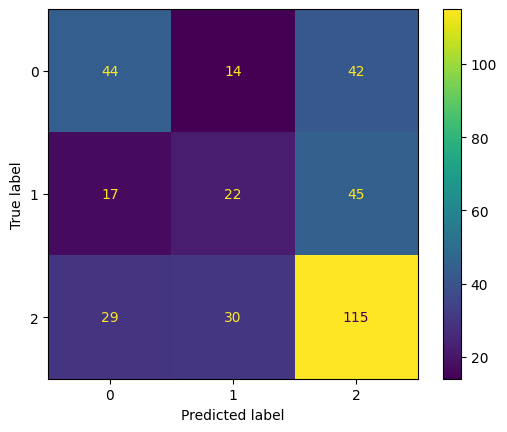

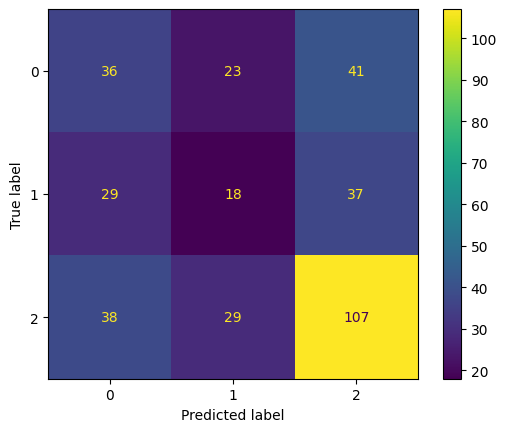

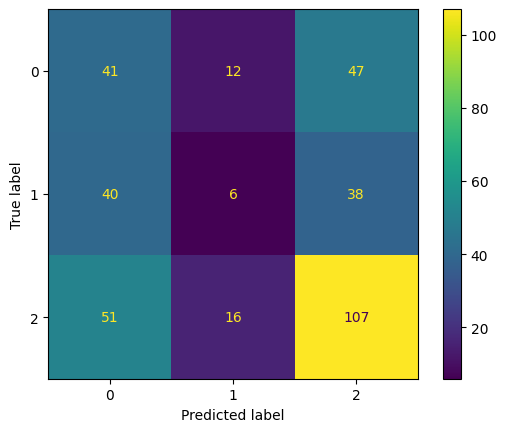

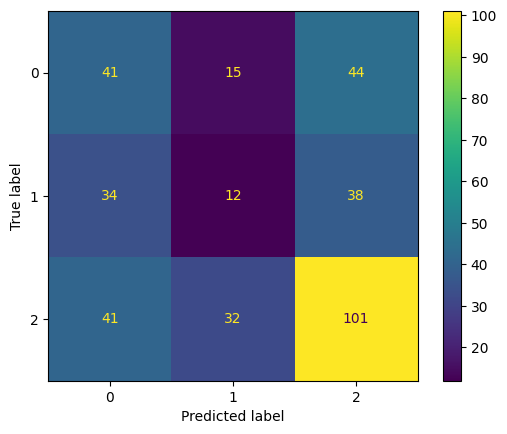

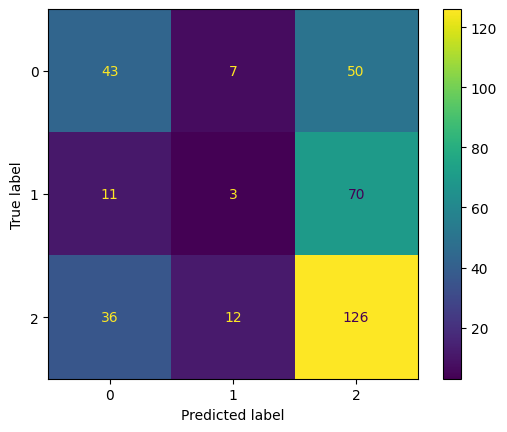

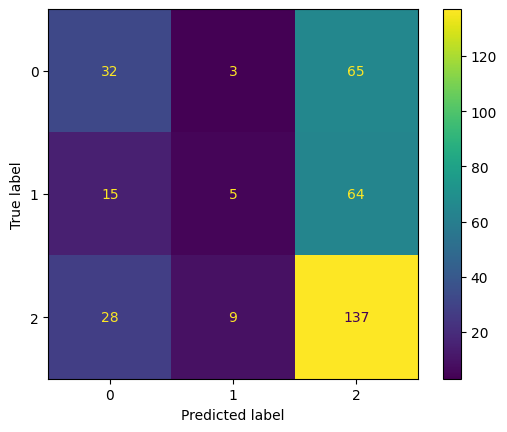

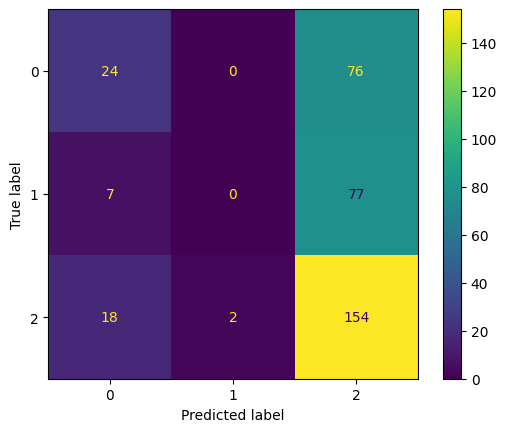

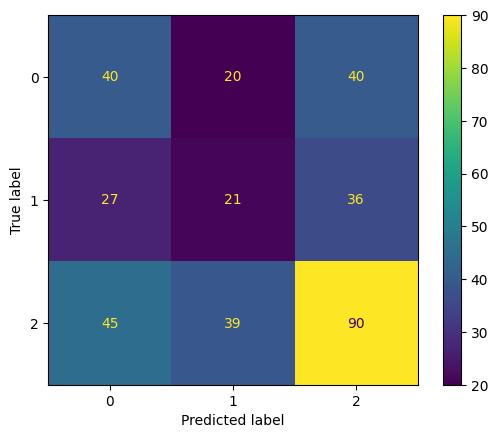

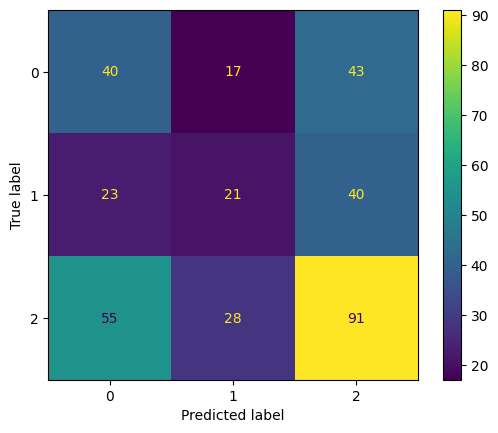

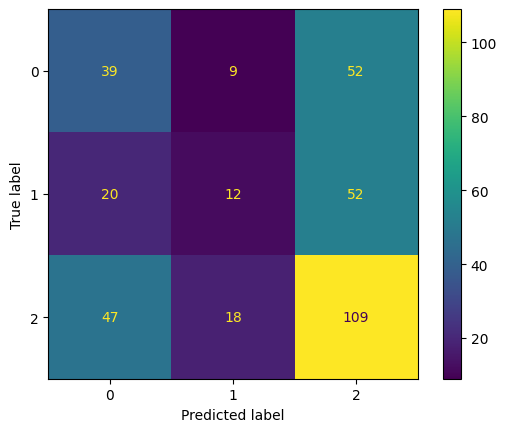

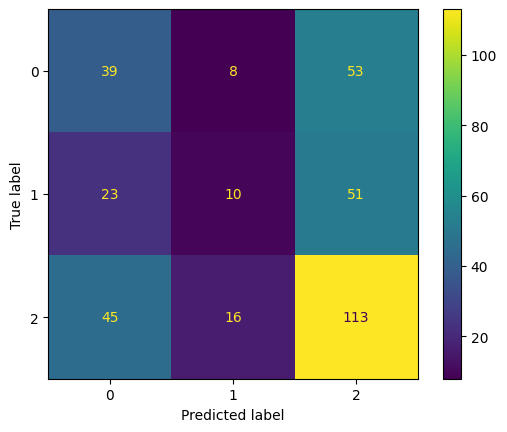

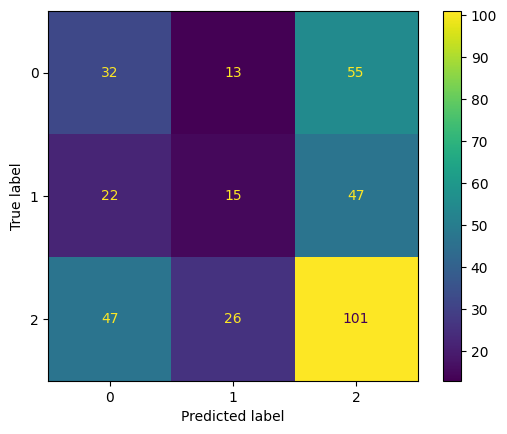

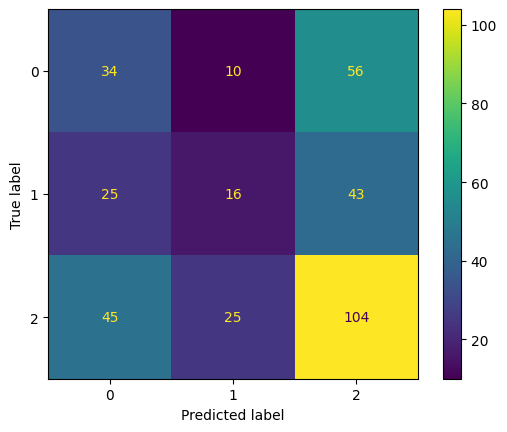

In [71]:
for classifier, name in classifiers:
  print(f"Training {name}")
  model_metrics = evaluate_classifier(classifier, X, y)
  cm = metrics.ConfusionMatrixDisplay(confusion_matrix=model_metrics["confusion_matrix"]).plot()
  track_model(classifier, name, log_model=False, model_metrics=model_metrics, params={"dataset_size": num_samples, "scaled":scaled, "history_feature": history_feature}, figures={"confusion_matrix": cm.figure_})

_______

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024)

In [76]:
model = LogisticRegression(max_iter=10000, random_state=2024)

In [78]:
trained_model = model.fit(X_train, y_train)

In [81]:
y_pred = trained_model.predict(X_test)

In [84]:
trained_model.score(X_test, y_test)

0.5333333333333333

In [85]:
import pickle

In [86]:
filename = 'log_reg_v0.sav'
pickle.dump(trained_model, open(filename, 'wb'))

In [ ]:

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

_______________